In [3]:
from transformers import BertTokenizer, BertModel, pipeline, AutoConfig, AutoModel, AutoModelForMaskedLM, AutoTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
MODEL_PATH = '../logs/1l1h_no_same_permutation/trained'

## Load Model

In [30]:
# Load pre-trained model and tokenizer
model = AutoModelForMaskedLM.from_pretrained(MODEL_PATH, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

## Get Attention Weights

In [14]:
# Encode text
text = "59 63 [SEP] [MASK]"

inputs = tokenizer(text, return_tensors='pt')

# Get model outputs
outputs = model(**inputs)
attention = outputs.attentions  # Get attention weights

## Check Information

In [31]:
# print(attention)
# print shape of attention
# print([a.shape for a in attention])
print(model)
print(type(attention))
print(len(attention))
print(type(attention[0]))
print(attention[0].shape)

# for i, a in enumerate(attention):
#     print(i)
#     print(a)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

## Visualization
- Visualize attention for the first layer, first head (which is the only attention map for 1l1h model)
- The first dimension of an attention map (y-axis) corresponds to "query" and the second dimension (x-axis) corresponds to "key"

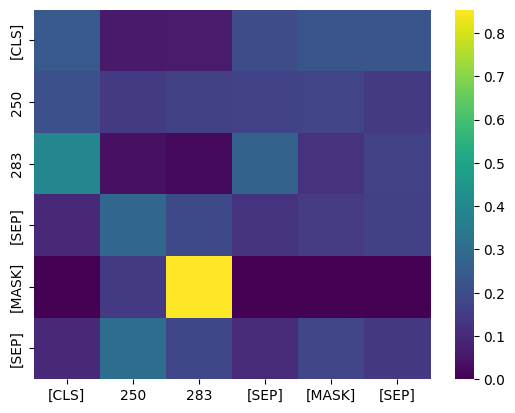

In [29]:
# Convert attention tensor to numpy
attn = attention[0][0][0].detach().numpy()

# Plot heatmap
sns.heatmap(attn, xticklabels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), yticklabels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), cmap='viridis')
plt.show()